In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_summary import DataFrameSummary
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
from sklearn.preprocessing import normalize
import time
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [2]:
path = 'C:/Users/tmznq/workspace/ml_scratch/dataset/titanic/train.csv'
path2 = 'C:/Users/tmznq/workspace/ml_scratch/dataset/titanic/test.csv'
path3 = 'C:/Users/tmznq/workspace/ml_scratch/dataset/titanic/gender_submission.csv'
data = pd.read_csv(path)
test = pd.read_csv(path2)
submission = pd.read_csv(path3)

In [3]:
data[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


- 1. 데이터셋 확인 - 대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 null data가 존재합니다. 이를 확인하고, 향후 수정합니다.
- 2. 탐색적 데이터 분석(exploratory data analysis) - 여러 feature 들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인합니다. 여러 시각화 툴을 사용하여 insight를 얻습니다.
- 3. feature engineering - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering 합니다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.
- 4. model 만들기 - sklearn 을 사용해 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn 을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을 사용할 수 도 있습니다.
- 5. 모델 학습 및 예측 - trainset 을 가지고 모델을 학습시킨 후, testset 을 가지고 prediction 합니다.
- 6. 모델 평가 - 예측 성능이 원하는 수준인지 판단합니다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다. 학습된 모델이 어떤 것을 학습하였는 지 확인해봅니다.

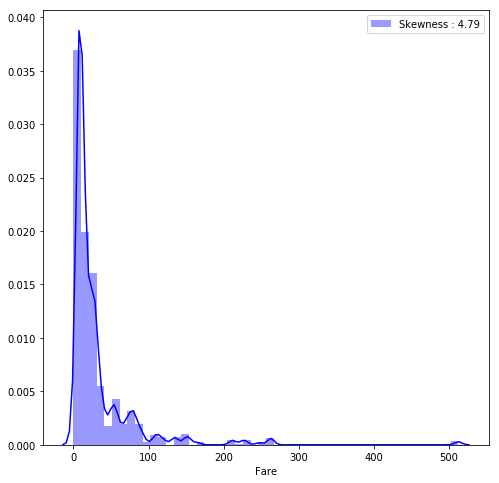

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(data['Fare'], color='b', label='Skewness : {:.2f}'.format(data['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- 위 Fare col은 보시다시피, distribution이 매우 비대칭인 것을 알 수 있습니다.(high skewness). 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수도 있습니다. 몇개 없는 outlier 에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있습니다.
- log를 취해보자

In [5]:
data['Fare'] = data['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
test['Fare'] = test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

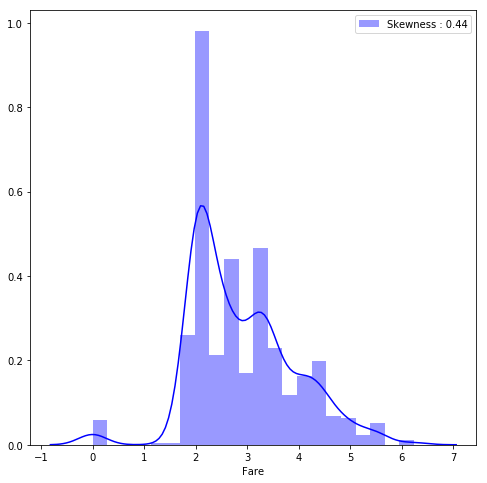

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(data['Fare'], color='b', label='Skewness : {:.2f}'.format(data['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

___
### 1. 전처리
#### 1) 범주형 데이터의 전처리

In [7]:
# Importing dataset
data = data

# Convert categorical variable to numeric
data["Sex_cleaned"]=np.where(data["Sex"]=="male",0,1)
data["Embarked_cleaned"]=np.where(data["Embarked"]=="S",0,
                                  np.where(data["Embarked"]=="C",1,
                                           np.where(data["Embarked"]=="Q",2,3)
                                          )
                                 )
test["Sex_cleaned"]=np.where(test["Sex"]=="male",0,1)
test["Embarked_cleaned"]=np.where(test["Embarked"]=="S",0,
                                  np.where(test["Embarked"]=="C",1,
                                           np.where(test["Embarked"]=="Q",2,3)
                                          )
                                 )
# Cleaning dataset of NaN

# data=data[[
#     "Survived",
#     "Pclass",
#     "Sex_cleaned",
#     "Age",
#     "SibSp",
#     "Parch",
#     "Fare",
#     "Embarked_cleaned"
# ]].dropna(axis=0, how='any')

___
#### 2) feature 추출 및 결측치 대체

In [8]:
used_features =[
    "Pclass",
    "Sex_cleaned",
    "Age",
    "Family",
    "Fare",
    "Embarked_cleaned"
]

#### Age의 NaN값 대체
- 정규 표현식
- lambda
- groupby

In [9]:
# Name's title
# Age와 Name을 이용해서 Age의 NaN값을 대체하기 위한 정규표현식 이용하기.
data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
test['Initial'] = test.Name.str.extract('([A-Za-z]+)\.')

In [10]:
# Initial에 따른 Age의 평균값으로 NaN값 대체
data['Age'] = data.groupby('Initial')['Age'].apply(lambda x: x.fillna(x.mean()))
test['Age'] = test.groupby('Initial')['Age'].apply(lambda x: x.fillna(x.mean()))

#### 결측치 제거 & 대체
- dropna()
- fillna()

In [11]:
test.loc[data.Fare.isnull(), 'Fare'] = data['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환합니다.
test.loc[data.Age.isnull(), 'Age'] = data['Age'].mean()

In [12]:
test.fillna(method='ffill', inplace=True)

In [13]:
DataFrameSummary(test).columns_stats

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_cleaned,Embarked_cleaned,Initial
counts,418,418,418,418,418,418,418,418,418,406,418,418,418,418
uniques,418,3,418,2,82,7,8,363,169,76,3,2,3,9
missing,0,0,0,0,0,0,0,0,0,12,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%,2.87%,0%,0%,0%,0%
types,numeric,numeric,unique,bool,numeric,numeric,numeric,categorical,numeric,categorical,categorical,bool,numeric,categorical


#### Feature Scaling
- minmax_normalize
- scale

In [14]:
# data[['Age', 'Fare']] = minmax_scale(data[['Age', 'Fare']])

___
#### Family col 생성
data['New_col'] = data + data

In [15]:
# SibSp + Parch + 1 = Family
data['Family'] = data['SibSp'] + data['Parch'] + 1
test['Family'] = test['SibSp'] + test['Parch'] + 1

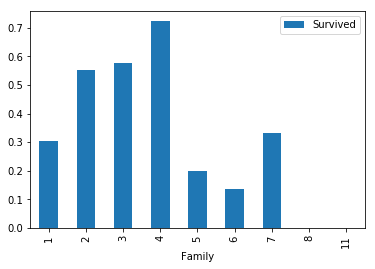

In [16]:
# 2~4 이상의 가족 구성원의 생존률이 50%가 넘음
data[['Family', 'Survived']].groupby(by='Family').agg('mean').plot.bar()

#### 연속형 변수 범주화
- pd.cut(), pd.qcut()
- data binning

In [17]:
data['Age'] = pd.cut(data['Age'], 7, labels=range(7))
# data['Fare'] = pd.cut(data['Fare'], 4, labels=range(4))

test['Age'] = pd.cut(test['Age'], 7, labels=range(7))
# test['Fare'] = pd.cut(test['Fare'], 4, labels=range(4))

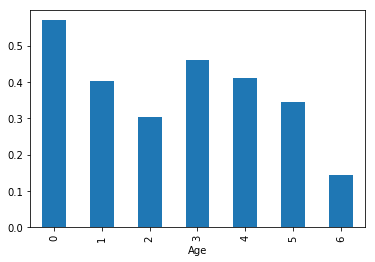

In [18]:
data.groupby('Age')['Survived'].mean().plot.bar()

___
#### 3) 데이터 나누기

In [19]:
# Split dataset in training and test datasets
X_train, X_test, y_train, y_test = train_test_split(data[used_features], 
                                                    data.Survived, test_size=0.4, stratify = data['Survived'])

___
### 2. Base 모델 생성

In [20]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=2000)
mlp.fit(X_train, y_train)
print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}\n".format(mlp.score(X_test, y_test)))# Decision tree

훈련 세트 정확도: 0.88
테스트 세트 정확도: 0.80



- 모델의 parameter를 하나도 건드리지 않았을 때, gnb의 예측도가 가장 높음.

___
### 3. 성능 개선 (추후 예정)
- Fare 정보만을 사용하여 분류를 제한하자.

In [21]:
mean_survival=np.mean(X_train["Survived"])
mean_not_survival=1-mean_survival
print("Survival prob = {:03.2f}%, Not survival prob = {:03.2f}%"
      .format(100*mean_survival,100*mean_not_survival))

Survival prob = 38.32%, Not survival prob = 61.68%


Compute probability distribution function :
- P(fare| Survival = 0)
- P(fare| Survival = 1)

In [22]:
# mean_fare_survived = np.mean(X_train[X_train["Survived"]==1]["Fare"])
# std_fare_survived = np.std(X_train[X_train["Survived"]==1]["Fare"])
# mean_fare_not_survived = np.mean(X_train[X_train["Survived"]==0]["Fare"])
# std_fare_not_survived = np.std(X_train[X_train["Survived"]==0]["Fare"])

# print("mean_fare_survived = {:03.2f}".format(mean_fare_survived))
# print("std_fare_survived = {:03.2f}".format(std_fare_survived))
# print("mean_fare_not_survived = {:03.2f}".format(mean_fare_not_survived))
# print("std_fare_not_survived = {:03.2f}".format(std_fare_not_survived))

#### 3. model 튜닝

In [21]:
learning_rate = ['constant', 'invscaling', 'adaptive']
alpha = [0.01, 0.1, 1, 10]
solver = ['lbfgs', 'sgd', 'adam']

for lr in learning_rate:
    for a in alpha:
        for sol in solver:
            mlp.set_params(learning_rate = lr, alpha = a, solver=sol)
            mlp.fit(X_train, y_train)
            print("{}\n".format(mlp))
            print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
            print("테스트 세트 정확도: {:.2f}\n".format(mlp.score(X_test, y_test)))

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50, 25), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

훈련 세트 정확도: 0.91
테스트 세트 정확도: 0.76

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50, 25), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

훈련 세트 정확도: 0.83
테스트 세트 정확도: 0.80

MLPClass

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50, 25), learning_rate='invscaling',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

훈련 세트 정확도: 0.87
테스트 세트 정확도: 0.79

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50, 25), learning_rate='invscaling',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

훈련 세트 정확도: 0.90
테스트 세트 정확도: 0.79

MLPClas

C:\Users\tmznq\Anaconda3\envs\ml_scratch\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50, 25), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

훈련 세트 정확도: 0.84
테스트 세트 정확도: 0.82

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50, 25), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

훈련 세트 정확도: 0.85
테스트 세트 정확도: 0.80

MLPClassifier(a

___
### 4. 결론

In [4]:
# 모델의 예측값
# model = 

model.fit(X_train, y_train)
y_pred = model.predict(test[used_features])

NameError: name 'model' is not defined

In [28]:
# submission의 Survived column을 예측한 값으로 대체하기
submission.Survived = y_pred

In [29]:
# DataFrame -> csv 파일 저장
submission.to_csv('gender_submission05.csv', index=False)

- 아래 업로드 하는 곳에다가 csv 형식으로 저장한 파일을 제출하면 됩니당.
- [업로드 하는 곳](https://www.kaggle.com/c/titanic/submit)